<a href="https://colab.research.google.com/github/snehaaraj27/Vehicale-Insurance-Fraud-Detection/blob/main/Vehicale_Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/fraud_oracle.csv.zip')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


**Handling missing data**


In [6]:
missing_values = data.isnull().sum()

In [7]:
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


**Convert categorial variables**

In [18]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [11]:
data['Make'] = data['Make'].astype('category')
data['AccidentArea'] = data['AccidentArea'].astype('category')
data['PolicyType'] = data['PolicyType'].astype('category')
data['VehicleCategory'] = data['VehicleCategory'].astype('category')
data['Fault'] = data['Fault'].astype('category')
data['Month'] = data['Month'].astype('category')
data['MonthClaimed'] = data['MonthClaimed'].astype('category')
data['PoliceReportFiled'] = data['PoliceReportFiled'].astype('category')


**Convert binary categorial to numerical**

In [13]:
data['FraudFound_P'] = data['FraudFound_P'].map({'Y':1, 'N':0})
data['PoliceReportFiled'] = data['PoliceReportFiled'].map({'Y': 1, 'N': 0})


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,NaN,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,NaN,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,NaN,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,NaN,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,NaN,No,External,none,no change,1 vehicle,1994,Collision


**EXPLOTING DATA ANALYSIS**

In [19]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,PoliceReportFiled,Year
count,15420.000000,15420.000000,15420.000000,0.0,15420.000000,15420.000000,15420.000000,15420.000000,0.0,15420.000000
mean,2.788586,2.693969,39.855707,NaN,7710.500000,8.483268,407.704280,2.487808,NaN,1994.866472
std,1.287585,1.259115,13.492377,NaN,4451.514911,4.599948,43.950998,1.119453,NaN,0.803313
min,1.000000,1.000000,0.000000,NaN,1.000000,1.000000,300.000000,1.000000,NaN,1994.000000
25%,2.000000,2.000000,31.000000,NaN,3855.750000,5.000000,400.000000,1.000000,NaN,1994.000000
50%,3.000000,3.000000,38.000000,NaN,7710.500000,8.000000,400.000000,2.000000,NaN,1995.000000
75%,4.000000,4.000000,48.000000,NaN,11565.250000,12.000000,400.000000,3.000000,NaN,1996.000000
max,5.000000,5.000000,80.000000,NaN,15420.000000,16.000000,700.000000,4.000000,NaN,1996.000000


In [20]:
summary_stats = data.describe()

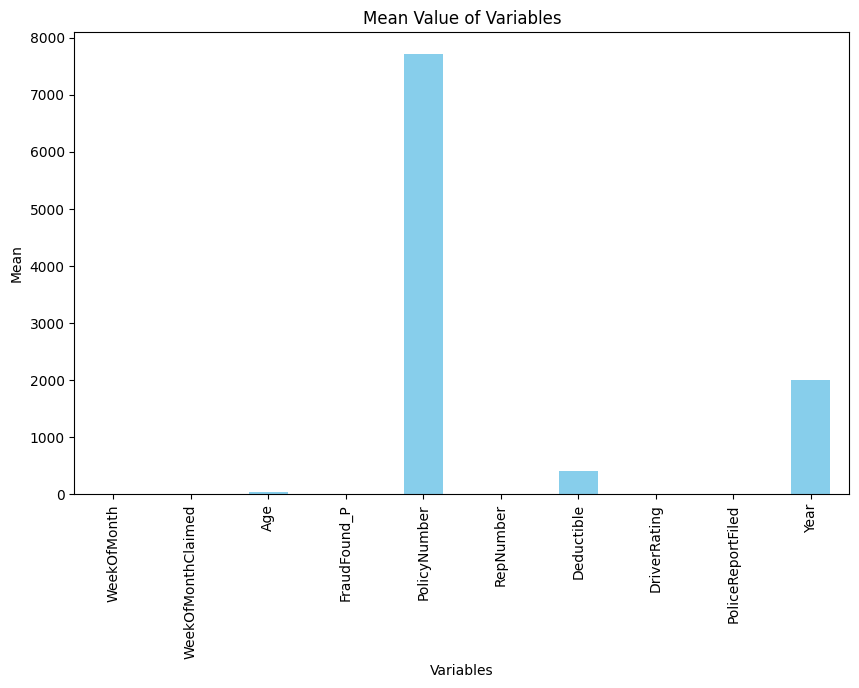

In [21]:
plt.figure(figsize=(10, 6))
summary_stats.loc['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Value of Variables')
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.show()

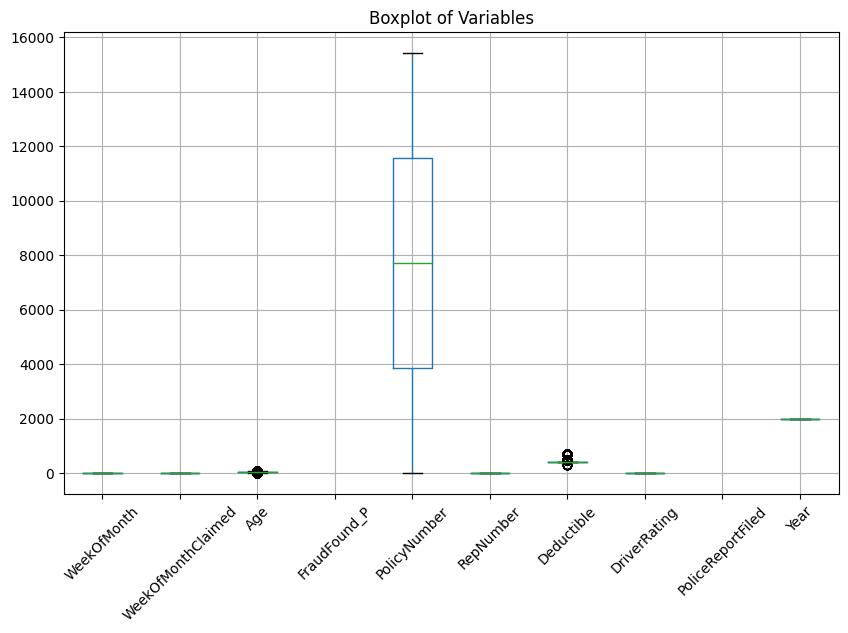

In [22]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)
plt.show()

**Correlation analysis**

In [23]:
correlation_matrix = data.corr()

<ipython-input-23-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [25]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

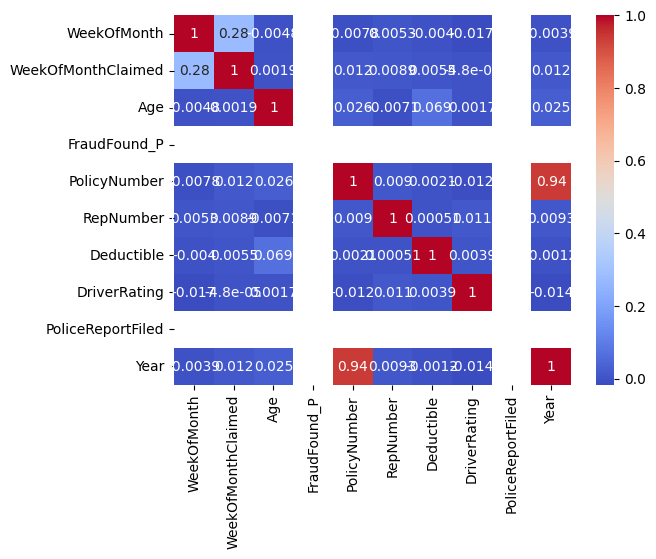

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

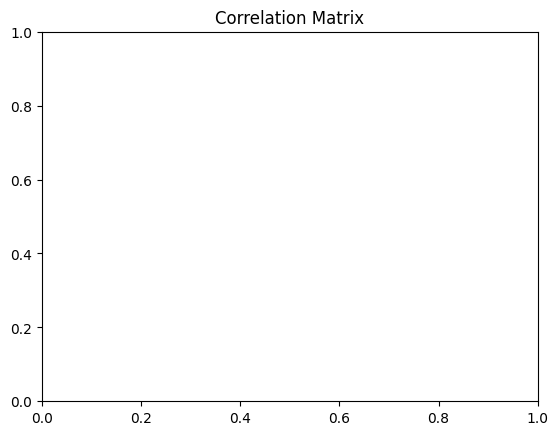

In [30]:
plt.title("Correlation Matrix")
plt.show()

**Dta visualtization**

In [31]:
plt.figure(figsize =(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='VehiclePrice', ylabel='Count'>

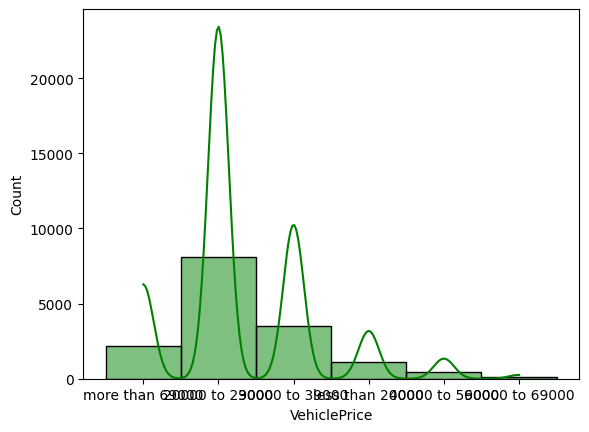

In [37]:
sns.histplot(data['VehiclePrice'], kde=True, color="green")

<Axes: title={'center': 'Distribution of vehicale Pricees'}, xlabel='VehiclePrice', ylabel='Count'>

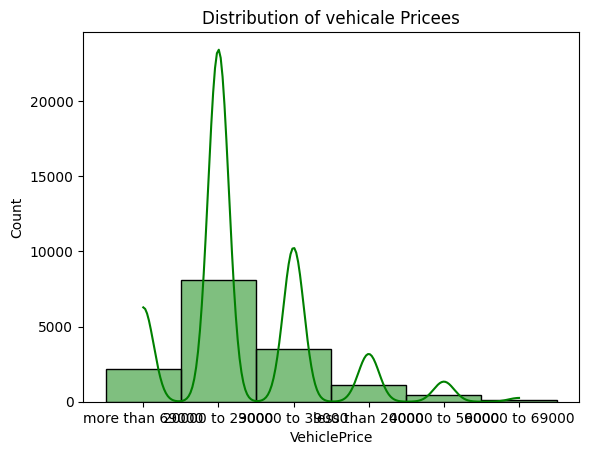

In [39]:
plt.title('Distribution of vehicale Pricees')
sns.histplot(data['VehiclePrice'], kde=True, color="green")

In [41]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

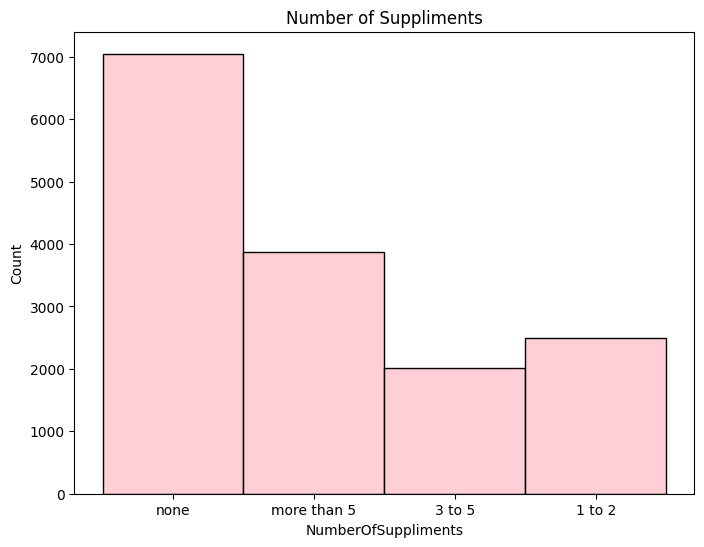

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(data['NumberOfSuppliments'], kde=False, color='pink', bins=2)
plt.title('Number of Suppliments')
plt.show()

**Investigating Fraud Patterns**

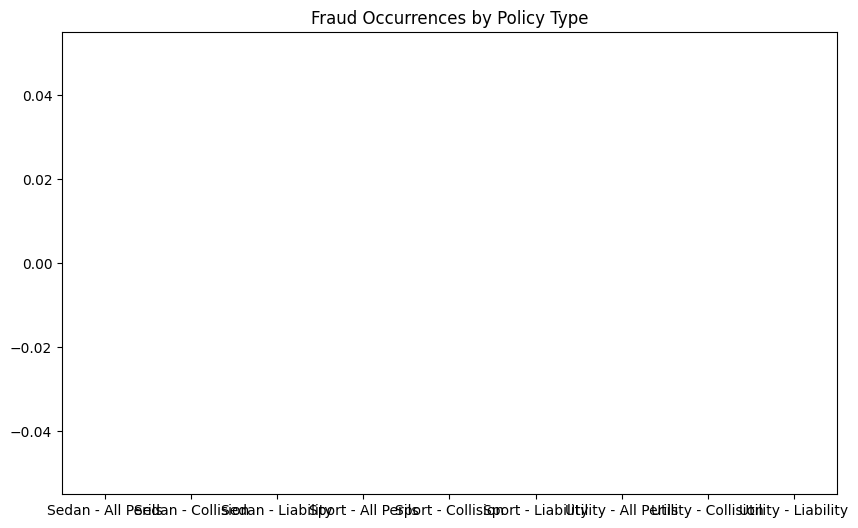

In [55]:
fraud_counts = data[data['FraudFound_P'] == 1]['PolicyType'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set2')
plt.title('Fraud Occurrences by Policy Type')
plt.show()


In [61]:
import matplotlib.pyplot as plt

<Axes: >

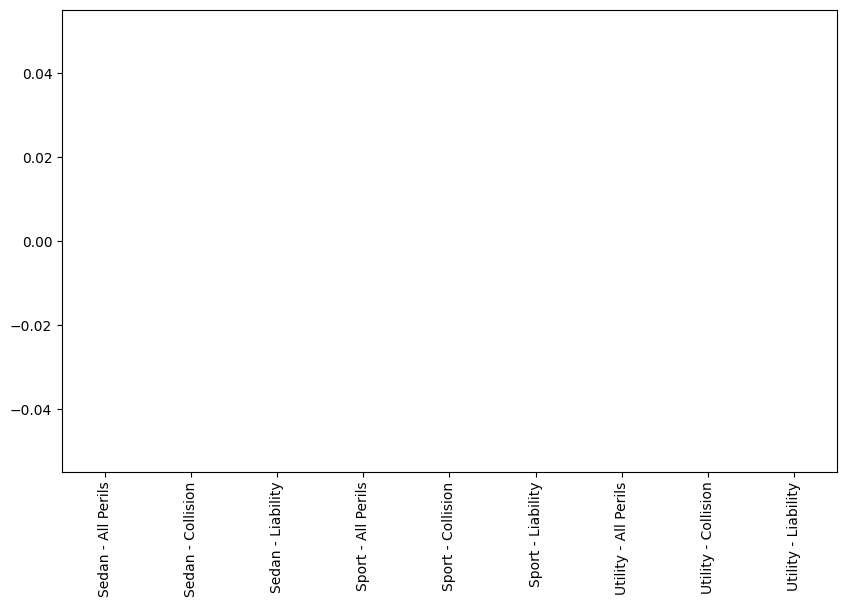

In [59]:
fraud_counts = data[data['FraudFound_P'] == 1]['PolicyType'].value_counts()
fraud_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

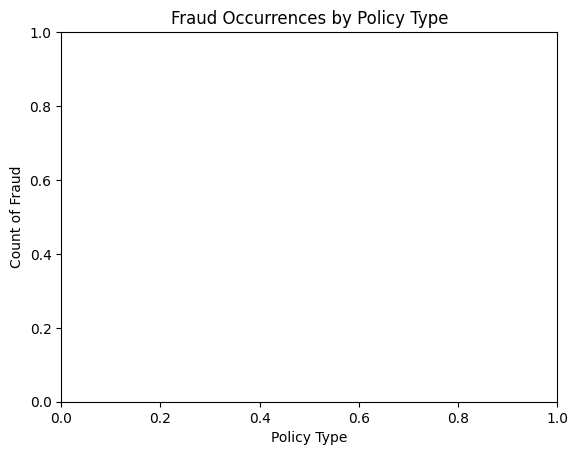

In [60]:
plt.title('Fraud Occurrences by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Count of Fraud')
plt.show()

**Data Analyst Task**

<ipython-input-63-c4893327fcd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


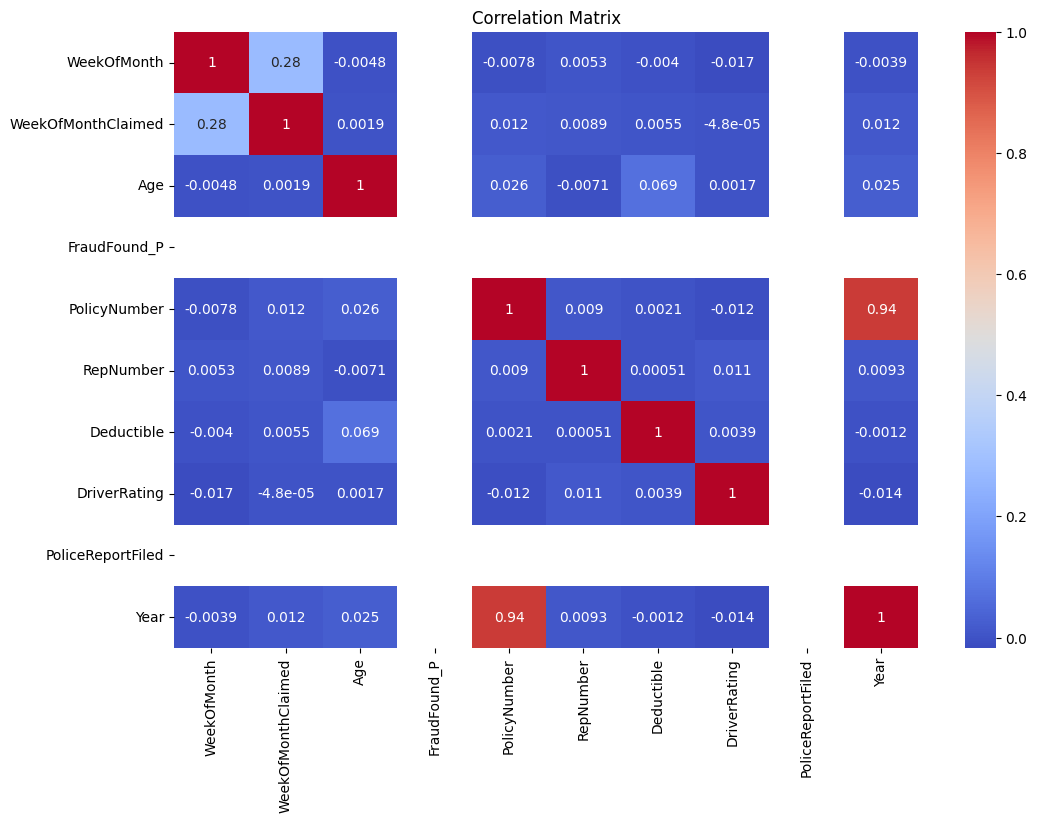

In [63]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

object


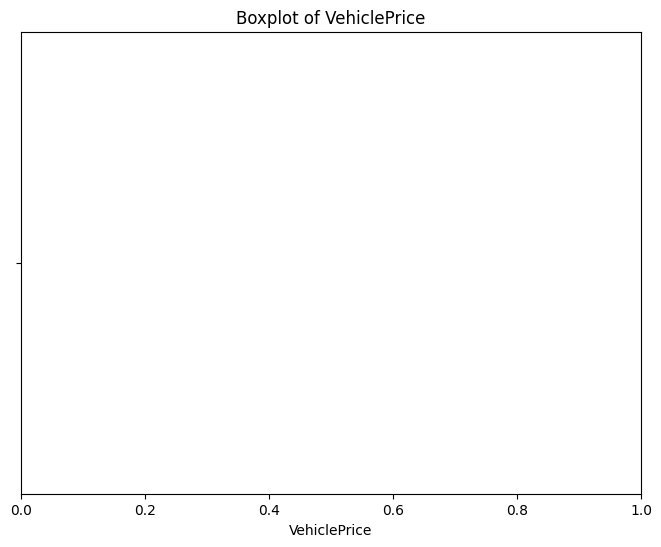

In [65]:
# Check the data type of the 'VehiclePrice' column
print(data['VehiclePrice'].dtype)

# Convert the column to a numeric data type if needed
data['VehiclePrice'] = pd.to_numeric(data['VehiclePrice'], errors='coerce')

# Plot the boxplot after ensuring the data type is numeric
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['VehiclePrice'], palette='Set2')
plt.title('Boxplot of VehiclePrice')
plt.show()


**Building predictive model**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [77]:
X = data[['Month', 'VehiclePrice', 'PastNumberOfClaims']]
y = data['FraudFound_P']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [93]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Month: [nan]
Unique values in DayOfWeek: [6 0 2 1 5 3 4]
Unique values in DayOfWeekClaimed: [6 2 5 1 7 3 4 0]
Unique values in MonthClaimed: [nan]
Unique values in WeekOfMonthClaimed: [1 4 2 3 5]
Unique values in Sex: [0 1]
Unique values in MaritalStatus: [2 1 3 0]
Unique values in Age: [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Unique values in Fault: [nan]
Unique values in PolicyType: [nan]
Unique values in VehicleCategory: [nan]
Unique values in VehiclePrice: [nan]
Unique values in FraudFound_P: [nan]
Unique values in PolicyNumber: [    1     2     3 ... 15418 15419 15420]
Unique values in RepNumber: [12 15  7  4  3 14  1 13 11 16  6  2  8  5  9 10]
Unique values in Deductible: [300 400 500 700]
Unique values in DriverRating: [1 4 3 2]
Unique values in Days_Policy_Accident: [3 1 4 0 2]
Unique values in Days_Po

In [94]:
data.fillna(data.mean(), inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

       Month     DayOfWeek  DayOfWeekClaimed  MonthClaimed  \
count    0.0  15420.000000      15420.000000           0.0   
mean     NaN      2.915759          4.202789           NaN   
std      NaN      2.055485          2.273944           NaN   
min      NaN      0.000000          0.000000           NaN   
25%      NaN      1.000000          2.000000           NaN   
50%      NaN      3.000000          5.000000           NaN   
75%      NaN      5.000000          6.000000           NaN   
max      NaN      6.000000          7.000000           NaN   

       WeekOfMonthClaimed           Sex  MaritalStatus           Age  Fault  \
count        15420.000000  15420.000000   15420.000000  15420.000000    0.0   
mean             2.693969      0.843061       1.303372     39.855707    NaN   
std              1.259115      0.363755       0.475131     13.492377    NaN   
min              1.000000      0.000000       0.000000      0.000000    NaN   
25%              2.000000      1.000000       

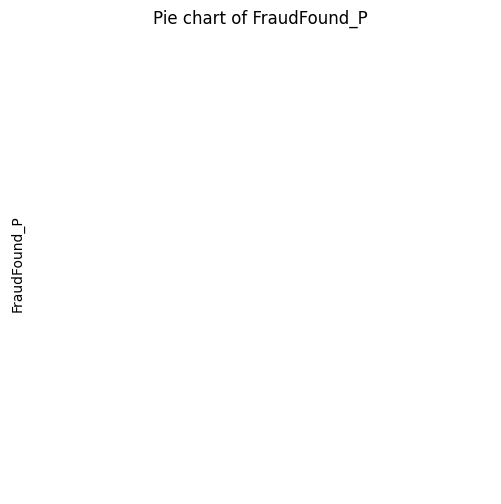

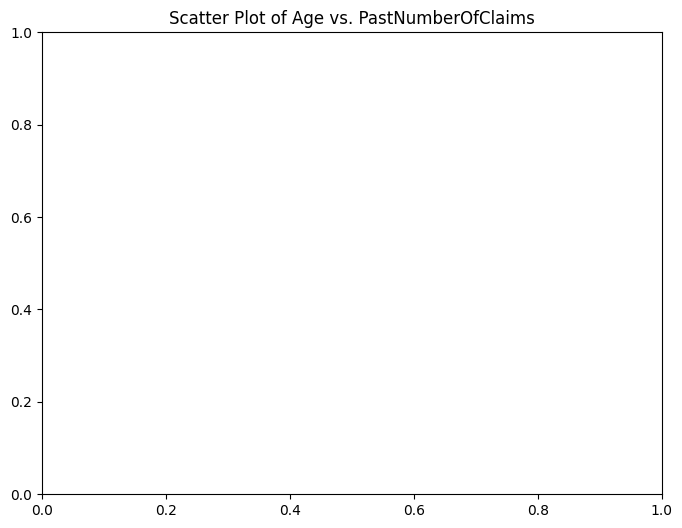

In [131]:
imputer = SimpleImputer(strategy='mean')

data_filled = data.fillna(data.mean())

data_imputed = pd.DataFrame(data_filled, columns=data.columns)


print(data_imputed.describe())


# Example: Pie chart of 'FraudFound_P'
plt.figure(figsize=(6, 6))
data_imputed['FraudFound_P'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart of FraudFound_P')
plt.show()



# Example: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='PastNumberOfClaims', hue='FraudFound_P', data=data_imputed)
plt.title('Scatter Plot of Age vs. PastNumberOfClaims')
plt.show()

X = data_imputed.drop('FraudFound_P', axis=1)
y = data_imputed['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [159]:
print("Dataset size:", len(data_cleaned))
if len(data_cleaned) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Insufficient data for train-test split. Add more data or adjust the test size.")


Dataset size: 0
Insufficient data for train-test split. Add more data or adjust the test size.


       Month  DayOfWeek  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  \
count    0.0        0.0               0.0           0.0                 0.0   
mean     NaN        NaN               NaN           NaN                 NaN   
std      NaN        NaN               NaN           NaN                 NaN   
min      NaN        NaN               NaN           NaN                 NaN   
25%      NaN        NaN               NaN           NaN                 NaN   
50%      NaN        NaN               NaN           NaN                 NaN   
75%      NaN        NaN               NaN           NaN                 NaN   
max      NaN        NaN               NaN           NaN                 NaN   

       Sex  MaritalStatus  Age  Fault  PolicyType  ...  Make_Mecedes  \
count  0.0            0.0  0.0    0.0         0.0  ...           0.0   
mean   NaN            NaN  NaN    NaN         NaN  ...           NaN   
std    NaN            NaN  NaN    NaN         NaN  ...           NaN   


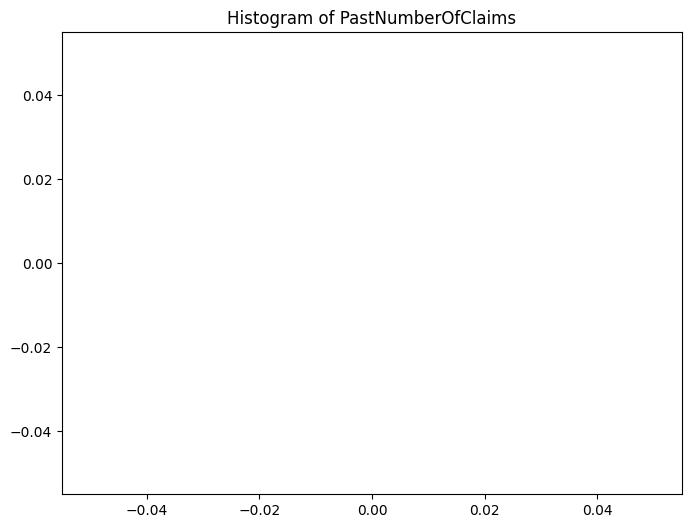

Dataset size: 0
Insufficient data for train-test split. Add more data or adjust the test size.


In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data_cleaned = data.dropna()
print(data_cleaned.describe())
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['PastNumberOfClaims'], kde=True)
plt.title('Histogram of PastNumberOfClaims')
plt.show()
X = data_cleaned.drop('FraudFound_P', axis=1)
y = data_cleaned['FraudFound_P']
print("Dataset size:", len(data_cleaned))

if len(data_cleaned) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Insufficient data for train-test split. Add more data or adjust the test size.")


In [156]:
print("Dataset size:", len(data_cleaned))
if len(data_cleaned) > 0:
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_search.fit(X, y)

    print("Best Parameters:", grid_search.best_params_)
else:
    print("Dataset contains no samples. Check the preprocessing steps or adjust the dataset.")


Dataset size: 0
Dataset contains no samples. Check the preprocessing steps or adjust the dataset.


In [155]:
data.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban
0,NaN,6,6,NaN,1,0,2,21,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,NaN,6,2,NaN,4,1,2,34,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,5,NaN,2,1,1,47,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,NaN,2,1,NaN,1,1,1,65,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,6,NaN,2,0,2,27,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


**Sneha Raj**